Install necessary libraries

In [1]:
!pip install matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Generate synthetic data

In [5]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

Fit DBSCAN model

In [6]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

Identify core points, boundary points, and noise

In [7]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

Number of clusters, ignoring noise if present

In [8]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

Visualize the DBSCAN clusters, core points, boundary points, and noise

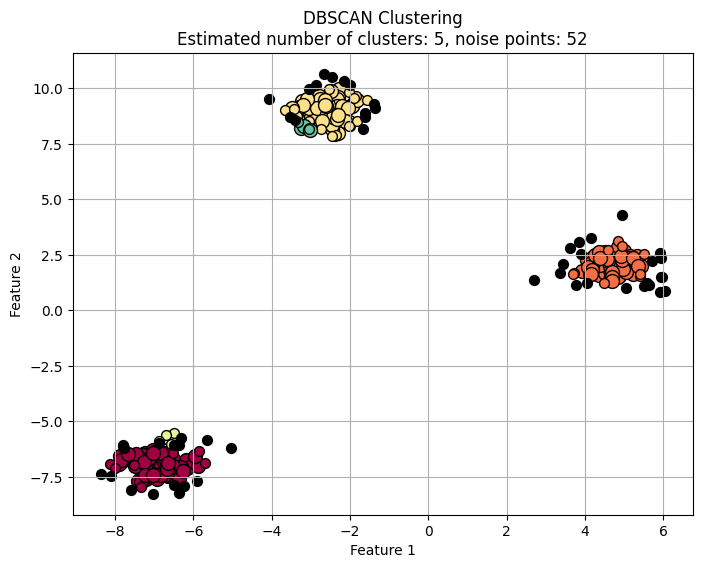

In [9]:
# Unique labels (-1 is for noise)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core points
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker='o', s=100, color=tuple(col), edgecolor='k', label=f'Cluster {k}' if k != -1 else 'Noise')

    # Plot boundary points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], marker='o', s=50, color=tuple(col), edgecolor='k')

plt.title(f'DBSCAN Clustering\nEstimated number of clusters: {n_clusters_}, noise points: {n_noise_}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

Calculate essential metrics for evaluation

In [10]:
# Silhouette Score (ignoring noise points for evaluation)
if n_clusters_ > 1:
    silhouette_avg_dbscan = silhouette_score(X[labels != -1], y_dbscan[labels != -1])  # Exclude noise points (-1)
    print(f"DBSCAN Silhouette Score (excluding noise): {silhouette_avg_dbscan:.2f}")
else:
    print("Silhouette Score is not meaningful with less than 2 clusters.")

DBSCAN Silhouette Score (excluding noise): 0.49
